In [ ]:
# Mount YOUR google drive. You'll need to "Add shortcut to Drive" for our shared folder for it to show up here.
# Use the URL shown below in the output to authorize this Colab session to access you GDrive
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

import csv
import math
import numpy as np
import scipy
import pandas as pd
from scipy import stats as sts
from numpy.random import default_rng
from plotnine import *
import matplotlib.pyplot as plt

rng = default_rng(13)

Mounted at /content/drive/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read file into a dataframe
# These data are AirBnB listings in New York City
# Price is the cost for one night
df_data = pd.read_csv("Exploratory Spatial Data Analysis\Airbnb_NewYork.csv")
df_data.head(3)
#df_data.shape #(22787, 11)
#df_data.columns #Index(['Unnamed: 0', 'latitude', 'longitude', 'property_type', 'room_type','accommodates', 'bathrooms',
#'bathrooms_text', 'bedrooms', 'beds','price'], dtype='object')

,Unnamed: 0,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,price
0,0,40.76402,-73.97278,Room in boutique hotel,Hotel room,5,2.0,2 baths,2.0,3.0,8.0
1,1,40.69099,-73.92603,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,2.0,10.0
2,2,40.77586,-73.96099,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,10.0




---



---



## <font color='orange'> Task 1 - Data summaries </font>
<font color='orange'> Calculate summary statistics for the 'price' column. In this activity, you can use for loops to implement the equations shown in class or call built-in pandas functions. </font>

In [ ]:
# Here is an example of how you can calculate the mean using a for loop
n = df_data.shape[0] # this is the number of data points you have
sum_of_prices = 0 # start a variable to store the sum of the price variable
for i in range(n): # for all data points
    sum_of_prices = sum_of_prices + df_data.loc[i,'price'] # in the for loop, add the values of the 'price' column

mean_price = sum_of_prices / n
mean_price

# A: 173
#my_mean =  df_data['price'].mean() #173.1309957431869

173.1309957431869

In [ ]:
# a)  Calculate the median price
median_price = df_data['price'].median()
median_price
# A: 140

140.0

In [ ]:
# b)  Calculate the standard deviation of the price
std_price = df_data['price'].std()
std_price
# A: 125

124.78403637885677

In [ ]:
# c)  Calculate the variance of the price
var_price = df_data['price'].var()
var_price
# A: 15571

15571.05573499985

In [ ]:
# d)  Calculate the minimum price
min_price = df_data['price'].min()
min_price
# A: 8

8.0

In [ ]:
# e)  Calculate the maximum price
max_price = df_data['price'].max()
max_price
# A: 677

677.0

In [ ]:
# f)  Calculate the price that represents the 10th percentile
# That is, the price that is lower than 90% of all prices
# Hint: https://numpy.org/doc/stable/reference/generated/numpy.percentile.html
ten_percentile = df_data['price'].quantile(q=0.1)
ten_percentile
# A: 50

50.0

In [ ]:
# g)  Calculate the price that represents the 90th percentile
# That is, the price that is lower than 10% of all prices
# Hint: https://numpy.org/doc/stable/reference/generated/numpy.percentile.html
ninthy_percentile = df_data['price'].quantile(q=0.9)
ninthy_percentile
# A: 350

350.0



---



---



## <font color='orange'> Task 2 - Histograms </font>
<font color='orange'> Plot a histogram of the price data. </font>

/usr/local/lib/python3.10/dist-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 64'. Pick better value with 'binwidth'.


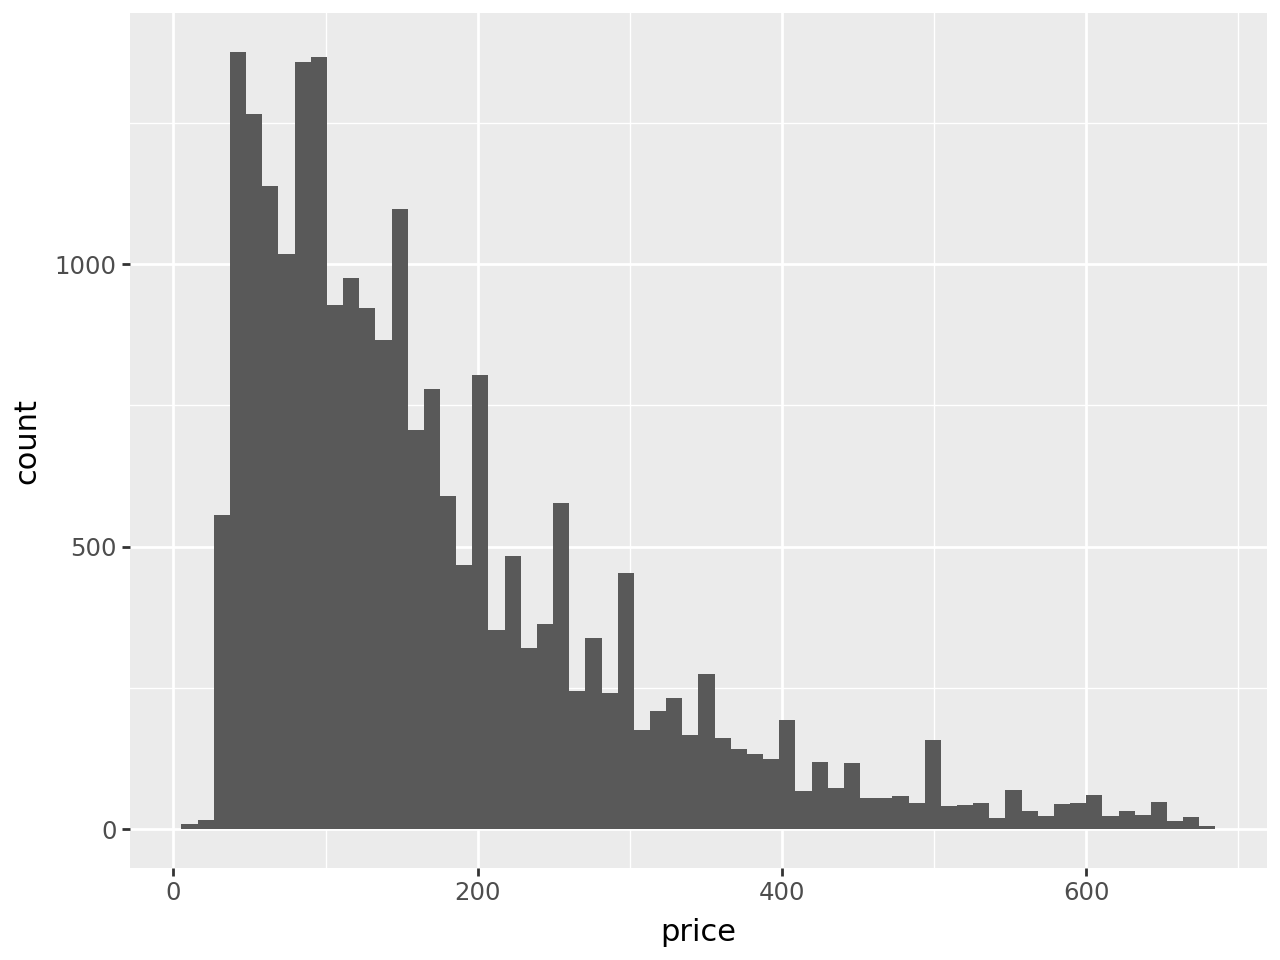

In [ ]:
# Create a plot called 'plot_hist_basic' with only basic features

plot_hist_basic = ggplot(df_data,
                   aes(x='price')) +\
                   geom_histogram()

plot_hist_basic
#plt.hist(df_data['price'], bins=64, edgecolor='black')

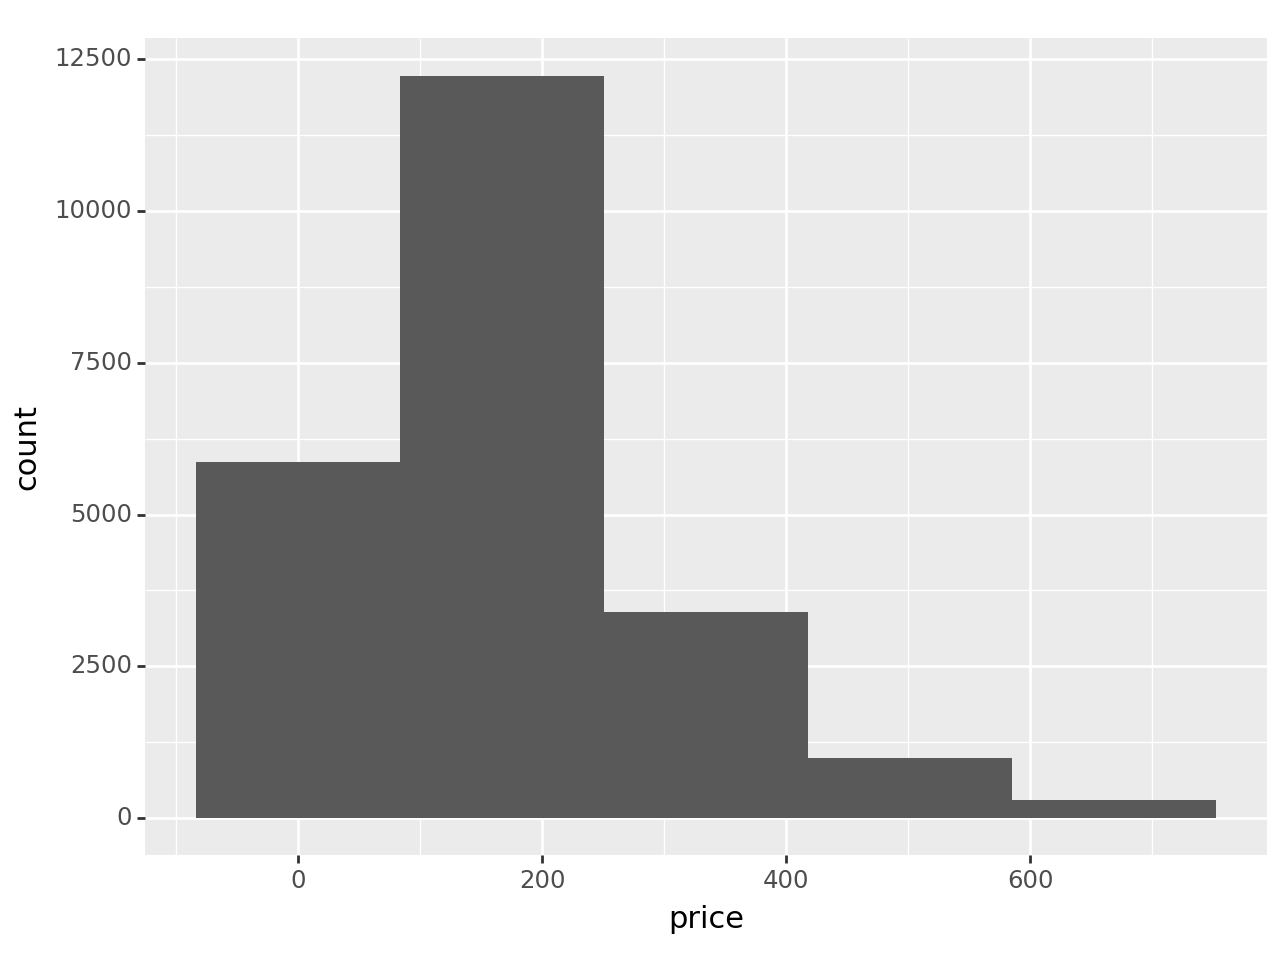

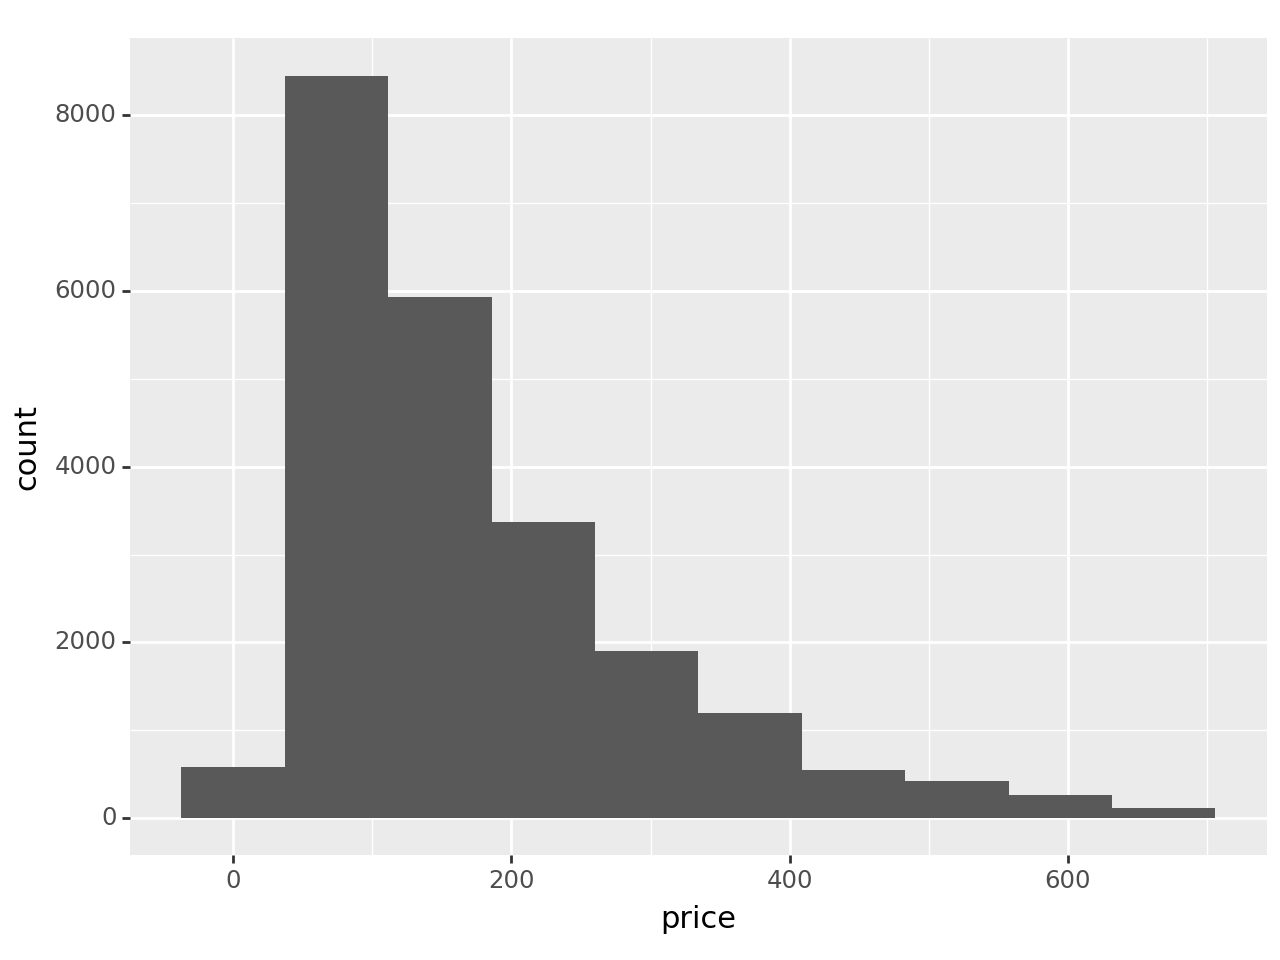

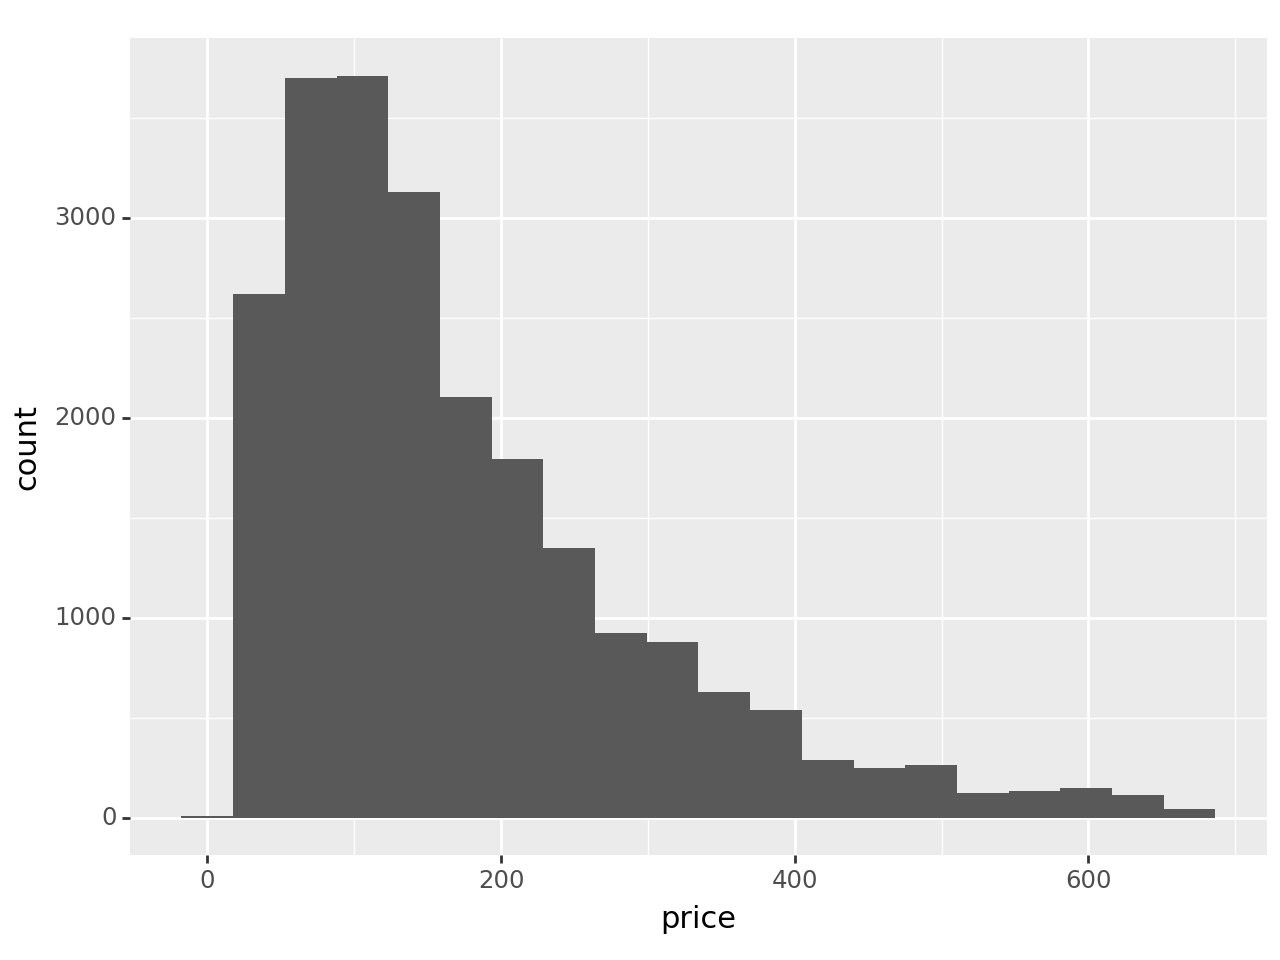

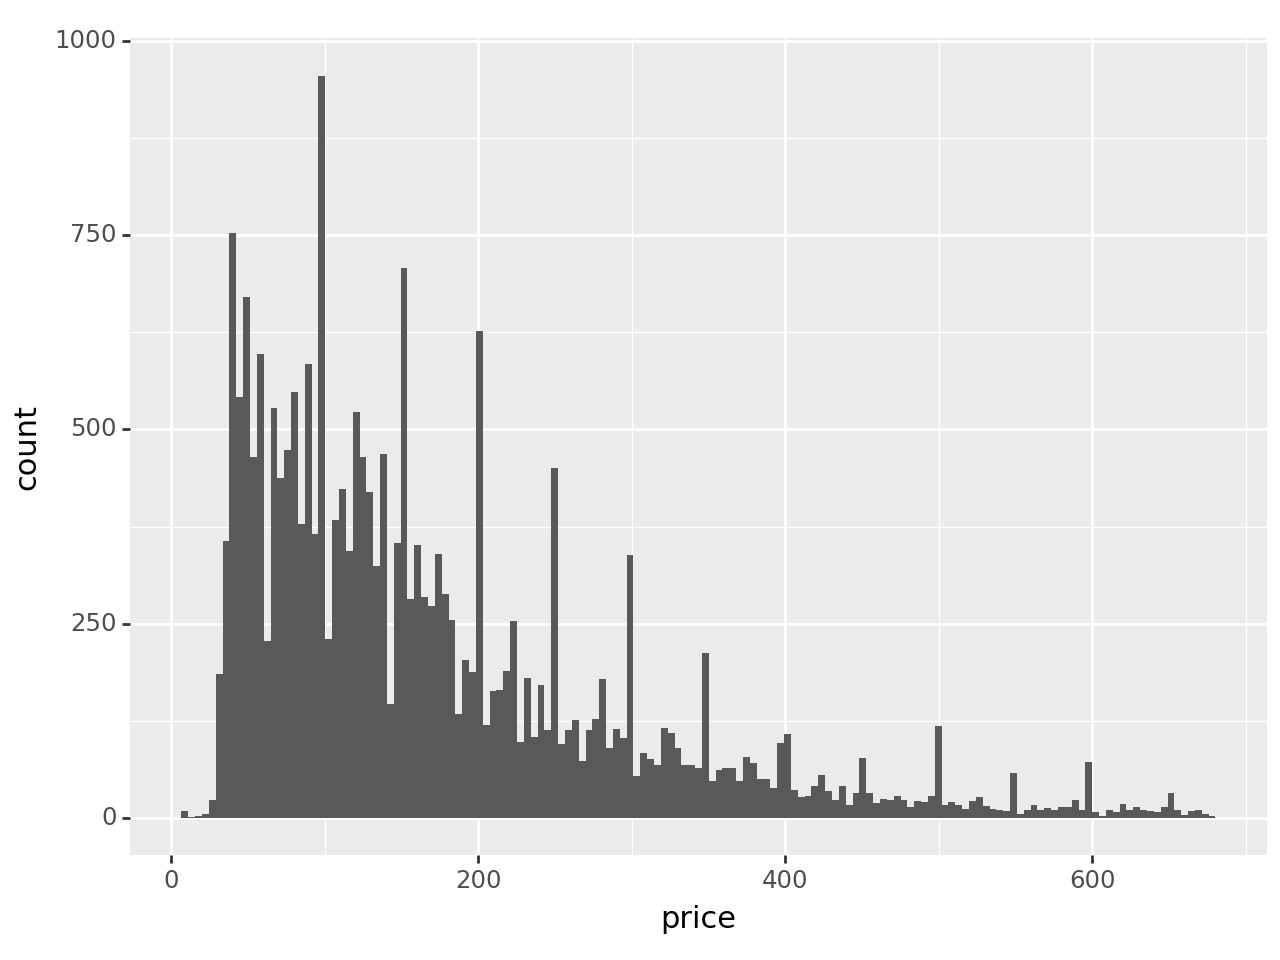

In [ ]:
# a)  plot the histogram with 5 bins
plot_hist_5bin = ggplot(df_data,
                   aes(x='price')) +\
                   geom_histogram(bins=5)

print(plot_hist_5bin)
# b)  plot the histogram with 10 bins
plot_hist_10bin = ggplot(df_data,
                   aes(x='price')) +\
                   geom_histogram(bins=10)

print(plot_hist_10bin)
# c)  plot the histogram with 20 bins
plot_hist_20bin = ggplot(df_data,
                   aes(x='price')) +\
                   geom_histogram(bins=20)

print(plot_hist_20bin)
# d)  plot the histogram with sqrt(k) bins (where k = number of data points)
plot_hist_sqrtk = ggplot(df_data,
                   aes(x='price')) +\
                   geom_histogram(bins=math.sqrt(n))

print(plot_hist_sqrtk)

The number of bins in a histogram plays a crucial role in how data distribution is visualized and interpreted. Adjusting the number of bins can affect our understanding of the data. For fewer Bins (5 bins), each bin covers a broader range of data values. This might lead to a loss of details, ignoring important features like multiple peaks (modes). Fewer Bins might hide outliers. Increasing the number of bins provides a more details view of the data. Each bin represents a narrower range, which can highlight finer details and reveal patterns(or trends) that might be missed with fewer bins. however, too many bins can introduce random noise, misleading about the data's true distribution, making it harder to recognize overall trends.
With fewer bins, local minima and maxima might be not obvious because the data is aggregated into larger intervals. With more bins, you can more precisely identify where data concentrations (maximum) and gaps (minimum) occur.  
The number of bins also affects the histogram's ability to accurately represent measures like skewness.
Therefore, choosing the appropriate number of bins is essential for accurately interpreting the data. It often requires a balance:
Too Few Bins: May oversimplify the data, hiding important features and leading to incorrect conclusions.
Too Many Bins: May overcomplicate the visualization, highlighting random fluctuations as significant patterns.


/usr/local/lib/python3.10/dist-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 64'. Pick better value with 'binwidth'.


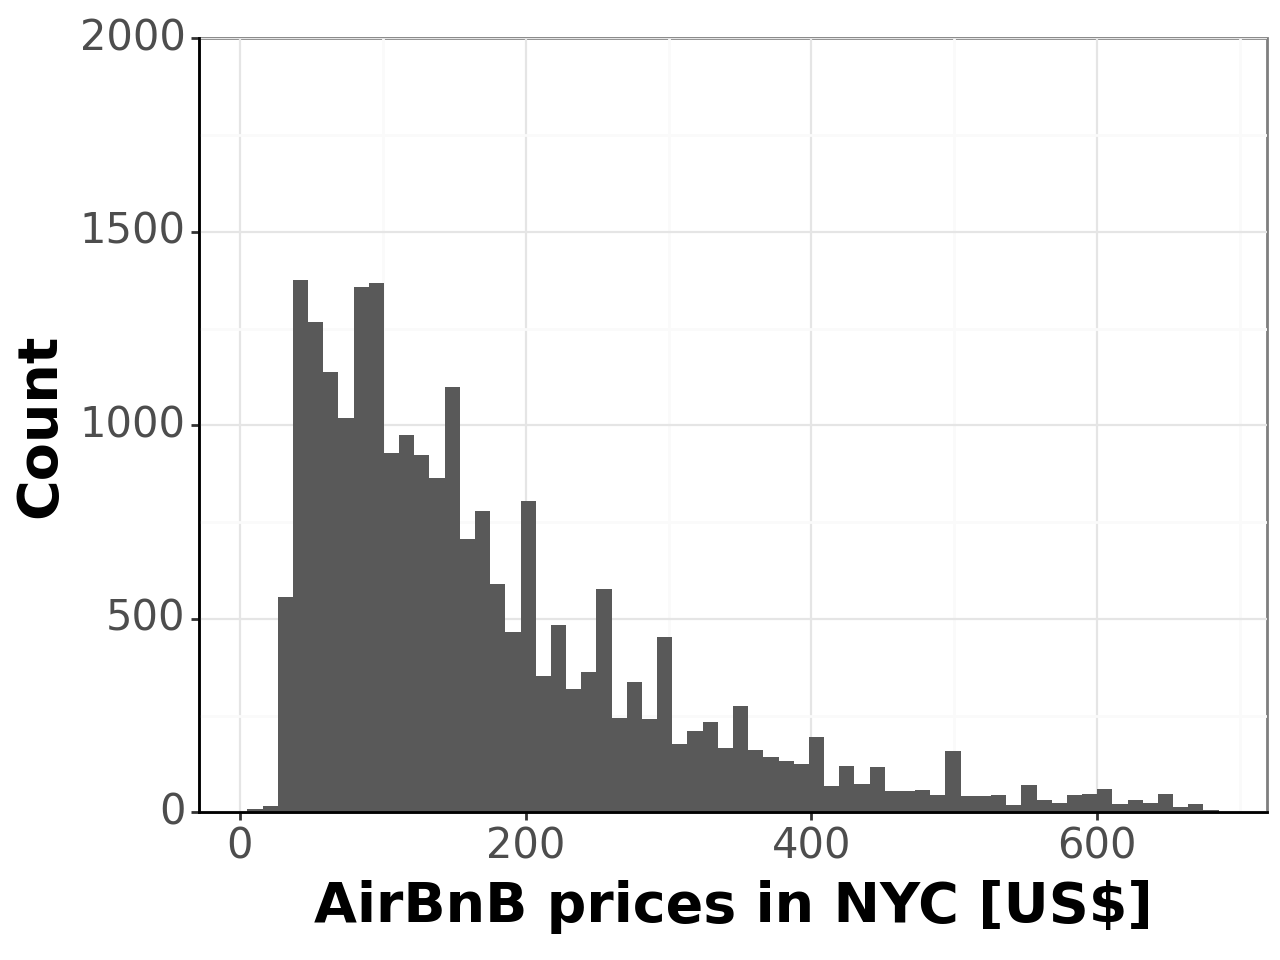

<Figure Size: (640 x 480)>

In [ ]:
# Add some features to the plot to make it look nicer
# You should become familiar with what each line does. Adapt this code to your liking and you can simply recycle it for all future plots in this course.

plot_hist_fancy = plot_hist_basic +\
        theme_bw() +\
        theme(
        axis_line=element_line(size=1),
        axis_text=element_text(size=15),
        axis_title=element_text(size=20,face="bold"),
        axis_text_x = element_text(angle = 0, hjust=2),
        legend_position = (0.84,0.82),
        legend_box_margin=8,
        legend_title=element_text(size=15,face='bold'),
        legend_key=element_rect(color = 'white'),
        legend_key_width=10,
        legend_key_size=10,
        legend_text=element_text(size=12),
        legend_direction = 'vertical',
        legend_background = element_rect(colour = 'black',alpha=0.5),
        ) +\
        labs(fill='Declaration')+\
        guides(fill=False)+\
        scale_fill_manual(values=['red']) +\
        scale_y_continuous(name = 'Count',expand=[0,0],limits=[0,2000]) +\
        scale_x_continuous(name = 'AirBnB prices in NYC [US$]')

plot_hist_fancy



---



---



## <font color='orange'> Task 3 - ECDF </font>
<font color='orange'> Calculate and plot the Empirical Cumulative Distribution Function for the price data </font>

In [ ]:
# Step 1: sort your dataframe by 'price' https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html
'''
In this step you need to sort df_data.
It is a good practice to create a copy of this data frame and save as a new dataframe.
e.g., df_data_sorted = df_data*do something to sort it*.copy()
'''
df_data_sorted = df_data.sort_values(by=['price']).copy()

In [ ]:
# Step 2: add a new column to df_data_sorted named 'ranking' where you calculate the ranking of that row
df_data_sorted['ranking'] =  range(1, len(df_data_sorted) + 1)
df_data_sorted['CDF'] = df_data_sorted['ranking']/len(df_data_sorted)

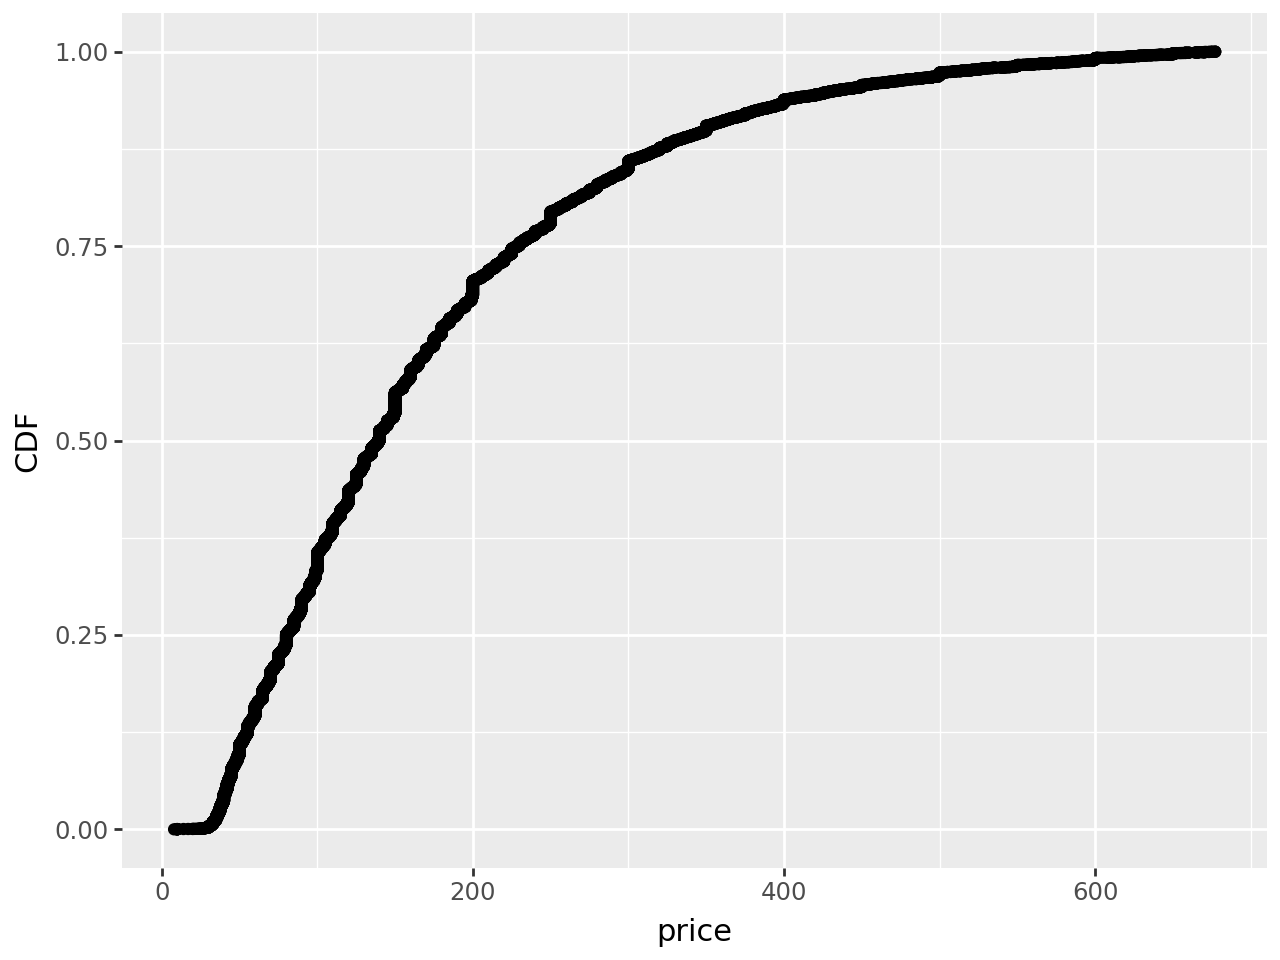

In [ ]:
# Step 3: create a scatter plot to show the empirical cumulative function

plot_ECDF = ggplot(df_data_sorted, aes("price", "CDF")) + geom_point()
plot_ECDF

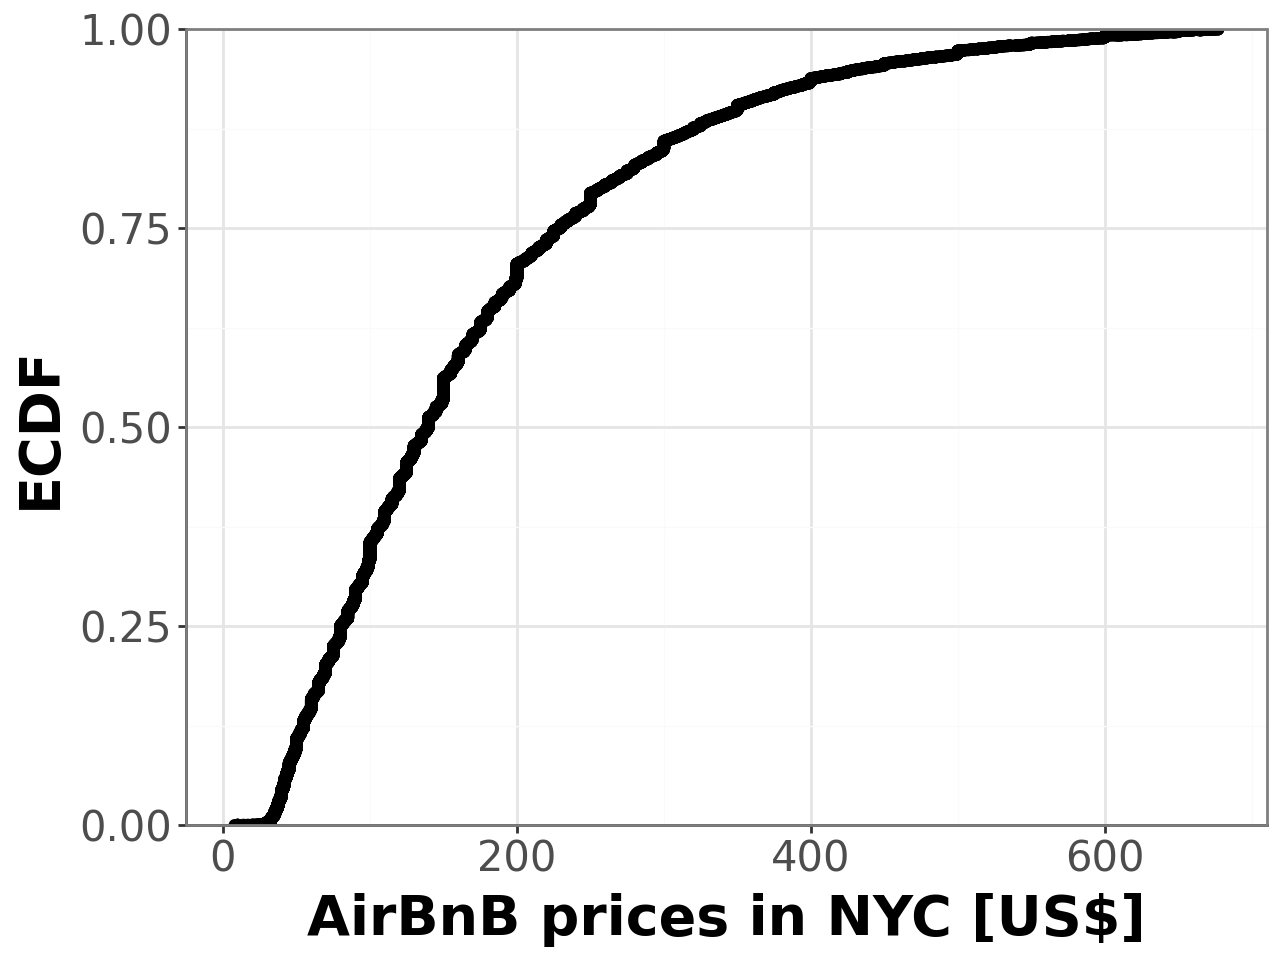

In [ ]:
# Make the plot look nicer with the code from Task 2
plot_ECDF_fancy = plot_ECDF +\
        theme_bw() +\
        theme(
        axis_line=element_line(size=1),
        axis_text=element_text(size=15),
        axis_title=element_text(size=20,face="bold"),
        axis_text_x = element_text(angle = 0, hjust=2),
        legend_position = (0.84,0.82),
        legend_box_margin=8,
        legend_title=element_text(size=15,face='bold'),
        legend_key=element_rect(color = 'white'),
        legend_key_width=10,
        legend_key_size=10,
        legend_text=element_text(size=12),
        legend_direction = 'vertical',
        legend_background = element_rect(colour = 'black',alpha=0.5),
        ) +\
        labs(fill='Declaration')+\
        guides(fill=False)+\
        scale_y_continuous(name = 'ECDF',expand=[0,0],limits=[0,1]) +\
        scale_x_continuous(name = 'AirBnB prices in NYC [US$]')

plot_ECDF_fancy



---



---



## <font color='orange'> Task 4 - ECDF vs ideallized distribution </font>
<font color='orange'> Compare the Empirical CDF with the Normal CDF </font>

In [ ]:
# Say you want to visually inspect (visual inspection has limitations!) of the price data follows a Normal distribution.
# An easy thing to do is to plot your ECDF versus an ideallized Normal distribution.
# To define the ideallized Normal distribution we need two parameters: mean (mu) and standard deviation (sigma)
# We can use that scipy stats function 'norm' to calculate the cumulative distribution function for a value x given mu and sigma
# E.g.,
mu = 0
sigma = 1

'''
This code returns the value of the cumulative distribution function at the value of x=0,
for a distribution with mean = 0, and standard deviation = 1.
Remember, the value of the CDF at x is the probability that a value from that distribution is <= than x.
Since x=mean, the CDF function must return 0.5 because the mean is the value with 0.5 probability of being being exceeded.
'''
sts.norm.cdf(0,mu,sigma)

0.5

In [ ]:
# Calculate the mean price
mean_price = df_data_sorted['price'].mean()

# Calculate the standard deviation of the price
stdev_price = df_data_sorted['price'].std()

# Add a new column to your dataframe named 'NormalCDF' where you calculate the function
# sts.norm.cdf(x,mean_price,stdev_price) to each value of 'price'
df_data_sorted['NormalCDF'] = df_data_sorted['price'].apply(lambda x: sts.norm.cdf(x,mean_price,stdev_price))
df_data_sorted

,Unnamed: 0,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,price,ranking,CDF,NormalCDF
0,0,40.764020,-73.972780,Room in boutique hotel,Hotel room,5,2.0,2 baths,2.0,3.0,8.0,1,0.000044,0.092862
7,7,40.765770,-73.970600,Room in boutique hotel,Hotel room,3,1.0,1 bath,1.0,2.0,10.0,2,0.000088,0.095554
6,6,40.764303,-73.972261,Room in boutique hotel,Hotel room,3,1.0,1 bath,1.0,1.0,10.0,3,0.000132,0.095554
5,5,40.765380,-73.970730,Room in boutique hotel,Hotel room,5,2.0,2 baths,2.0,3.0,10.0,4,0.000176,0.095554
8,8,40.764280,-73.972790,Room in boutique hotel,Hotel room,5,2.0,2 baths,2.0,3.0,10.0,5,0.000219,0.095554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22781,22819,40.772632,-73.952082,Entire rental unit,Entire home/apt,8,3.0,3 baths,4.0,4.0,675.0,22783,0.999824,0.999971
22783,22821,40.750446,-73.995996,Entire rental unit,Entire home/apt,12,2.0,2 baths,4.0,5.0,675.0,22784,0.999868,0.999971
22785,22823,40.731786,-73.986341,Entire rental unit,Entire home/apt,7,1.0,1 bath,4.0,6.0,677.0,22785,0.999912,0.999973
22784,22822,40.667330,-73.930930,Entire home,Entire home/apt,12,4.5,4.5 baths,6.0,6.0,677.0,22786,0.999956,0.999973


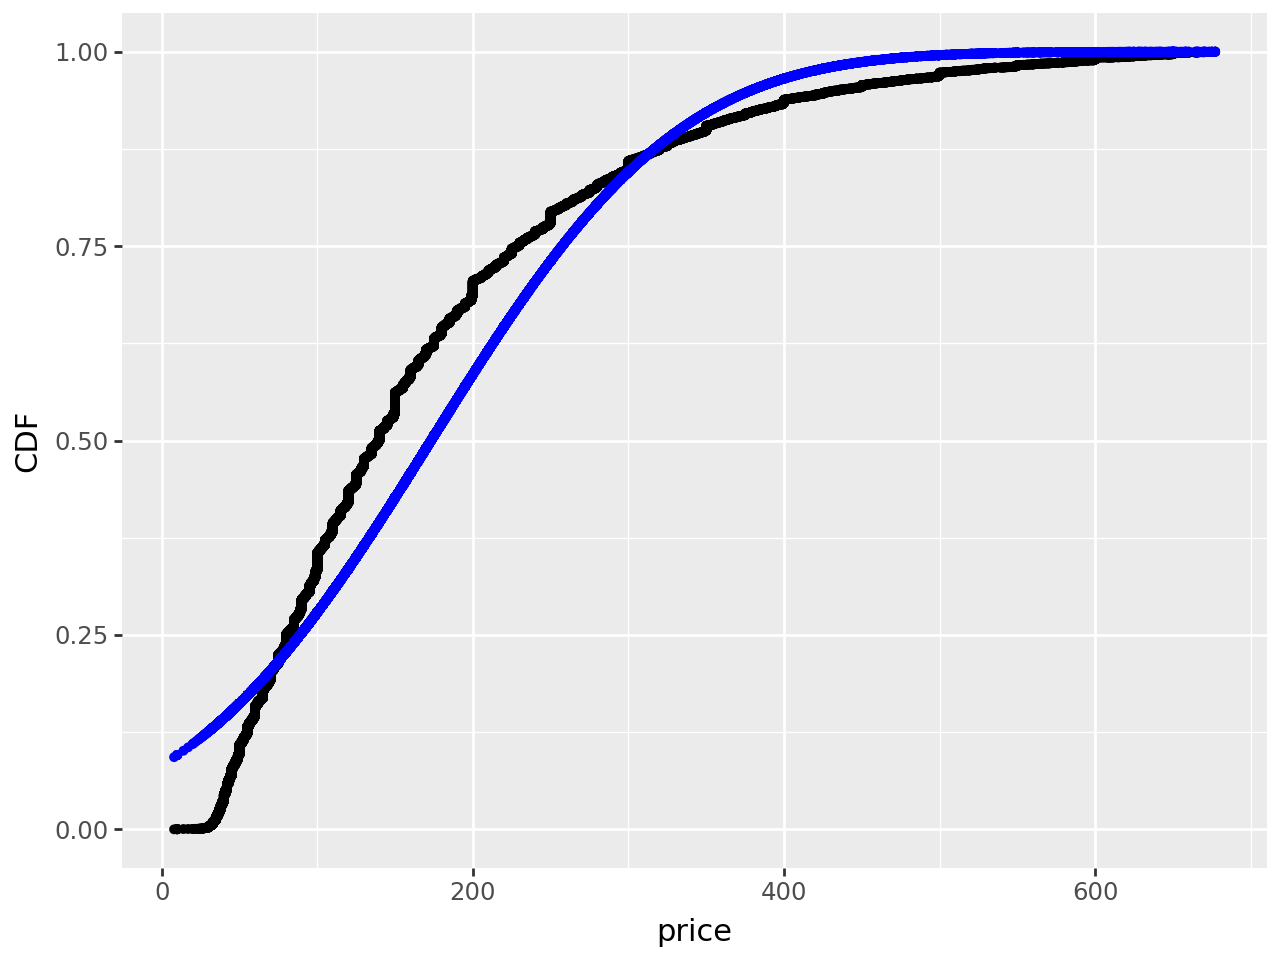

In [ ]:
# If you followed the column names above, here is one way to plot both curves
#plot_ECDF = ggplot(df_data_sorted) +\
                   #geom_point(aes(x='price',y='ranking'), size=1) +\
                   #geom_point(aes(x='price',y='NormalCDF'), size=1, color='blue')
plot_ECDF = ggplot(df_data_sorted) +\
                   geom_point(aes(x='price',y='CDF'), size=1) +\
                   geom_point(aes(x='price',y='NormalCDF'), size=1, color='blue')
# Blue: normal CDF
# Black: ECDF
# Later we will learn how to plot this more adequately including a legend.
plot_ECDF

In [ ]:
# Calculate/show the probability that AirBnB prices in NYC do not exceed

# a) $20
# b) $200
# c) $500

In [ ]:
# a)
#ECDF
ECDF_20 = len(df_data_sorted[df_data_sorted['price']<=20])/len(df_data_sorted)
print(f'ECDF_20 = {ECDF_20}')
#Normal distribution
Normal_CDF20 = sts.norm.cdf(20,mean_price,stdev_price)
print(f'Normal_CDF20 = {Normal_CDF20}')

ECDF_20 = 0.0005705007240970729
Normal_CDF20 = 0.10987969782667278


In [ ]:
# b)
#ECDF
ECDF_200 = len(df_data_sorted[df_data_sorted['price']<=200])/len(df_data_sorted)
print(f'ECDF_200 = {ECDF_200}')
#Normal distribution
Normal_CDF200 = sts.norm.cdf(200,mean_price,stdev_price)
print(f'Normal_CDF200 = {Normal_CDF200}')

ECDF_200 = 0.7054899723526572
Normal_CDF200 = 0.5852426604337956


In [ ]:
# c)
#ECDF
ECDF_500 = len(df_data_sorted[df_data_sorted['price']<=500])/len(df_data_sorted)
print(f'ECDF_500 = {ECDF_500}')
#Normal distribution
Normal_CDF500 = sts.norm.cdf(500,mean_price,stdev_price)
print(f'Normal_CDF500 = {Normal_CDF500}')

ECDF_500 = 0.9730548119541844
Normal_CDF500 = 0.9955967738626756


In [ ]:
'''
Based on the visual inspection and the calculations, the normal distribution does not appear to be a good fit for Airbnb price data in NYC.
The price data is likely positively skewed (right-skewed). The normal distribution is symmetric and does not account for skewness, making it unsuitable for modeling skewed data.
The normal distribution does not adequately account for the extreme high prices observed in the data because Airbnb prices are influenced by various factors such as location.
Presence of outliers (extremely high-priced listings) can distort the distribution . Since prices cannot be negative and the data is positively skewed, the log-normal distribution might be a better fit.
'''



---



---



## <font color='orange'> Task 5 - Correlation </font>
<font color='orange'> Assess correlations </font>

In [ ]:
# In this task we will work with a subset of the original data
df_data_selected = df_data[['latitude','longitude','bathrooms','bedrooms','price']].copy()
df_data_selected.head(3)

,latitude,longitude,bathrooms,bedrooms,price
0,40.76402,-73.97278,2.0,2.0,8.0
1,40.69099,-73.92603,1.0,1.0,10.0
2,40.77586,-73.96099,1.0,1.0,10.0


In [ ]:

'''
number of rooms is most positively correlated with room price. The number of bedrooms is a primary determinant of a property's size
and capacity, directly influencing its price. More bedrooms allow for more guests, increasing the property's value and justifying a
higher price. properties with more bedrooms typically have higher prices due to increased utility.
As the number of bedrooms increases, we expect the room price to increase.Calculating the Pearson correlation coefficient between
room price and number of bedrooms would be a value greater than 0, indicating a positive relationship.
'''

'''
Bathrooms are valuable amenities that enhance the functionality and convenience of a property. More bathrooms typically increase a
property's appeal to guests. higher comfort and convenience result in higher price. therefore, there is positive correlation.
'''

'''
Latitude and longitude determine the property's location, which affects price based on neighborhood desirability.
In a city like New York, the relationship between location and price is complex due to factors like proximity
to landmarks, transportation, and neighborhood prestige. The impact of location on price may not be strictly linear
or positively correlated in a simple way with latitude  or longitude values.
'''

In [ ]:
# Calculate the Pearson correlation between number of bedrooms and room price using a 'loop'
# That is, do not use a built-in function
m = len(df_data_selected)

def mean_calculation(n,df,column):
  sum = 0
  for i in range(m):
    sum = sum + df.loc[i,column]
  mean = sum/ n
  return mean

mean_bedrooms = mean_calculation(m,df_data_selected,'bedrooms')
mean_price = mean_calculation(m,df_data_selected,'price')


#mean_bedrooms = df_data_selected['bedrooms'].mean()
#mean_price = df_data_selected['price'].mean()

sum_of_nominator = 0
sum_squared_diff_bedrooms = 0
sum_squared_diff_prices = 0

for i in range(m): # for all data points
    sum_of_nominator += (df_data_selected.loc[i,'price']-mean_price) * (df_data_selected.loc[i,'bedrooms']-mean_bedrooms)

    # Denominator: Sum of squared differences
    sum_squared_diff_bedrooms += (df_data_selected.loc[i,'bedrooms']-mean_bedrooms) ** 2
    sum_squared_diff_prices += (df_data_selected.loc[i,'price']-mean_price) ** 2

denominator = (sum_squared_diff_bedrooms * sum_squared_diff_prices) ** 0.5
r_pearson = sum_of_nominator/denominator
print(r_pearson)
# You can compare your results with the built-in function in Pandas shown below
# Say you want to calculate the Pearson correlation between data_series_1 and data_series_2
# this is how you do it: data_series_1.corr(data_series_2)
# For example
df_data_selected['price'].corr(df_data_selected['bedrooms'], method='pearson')

0.23158312342800624


0.23158312342803797

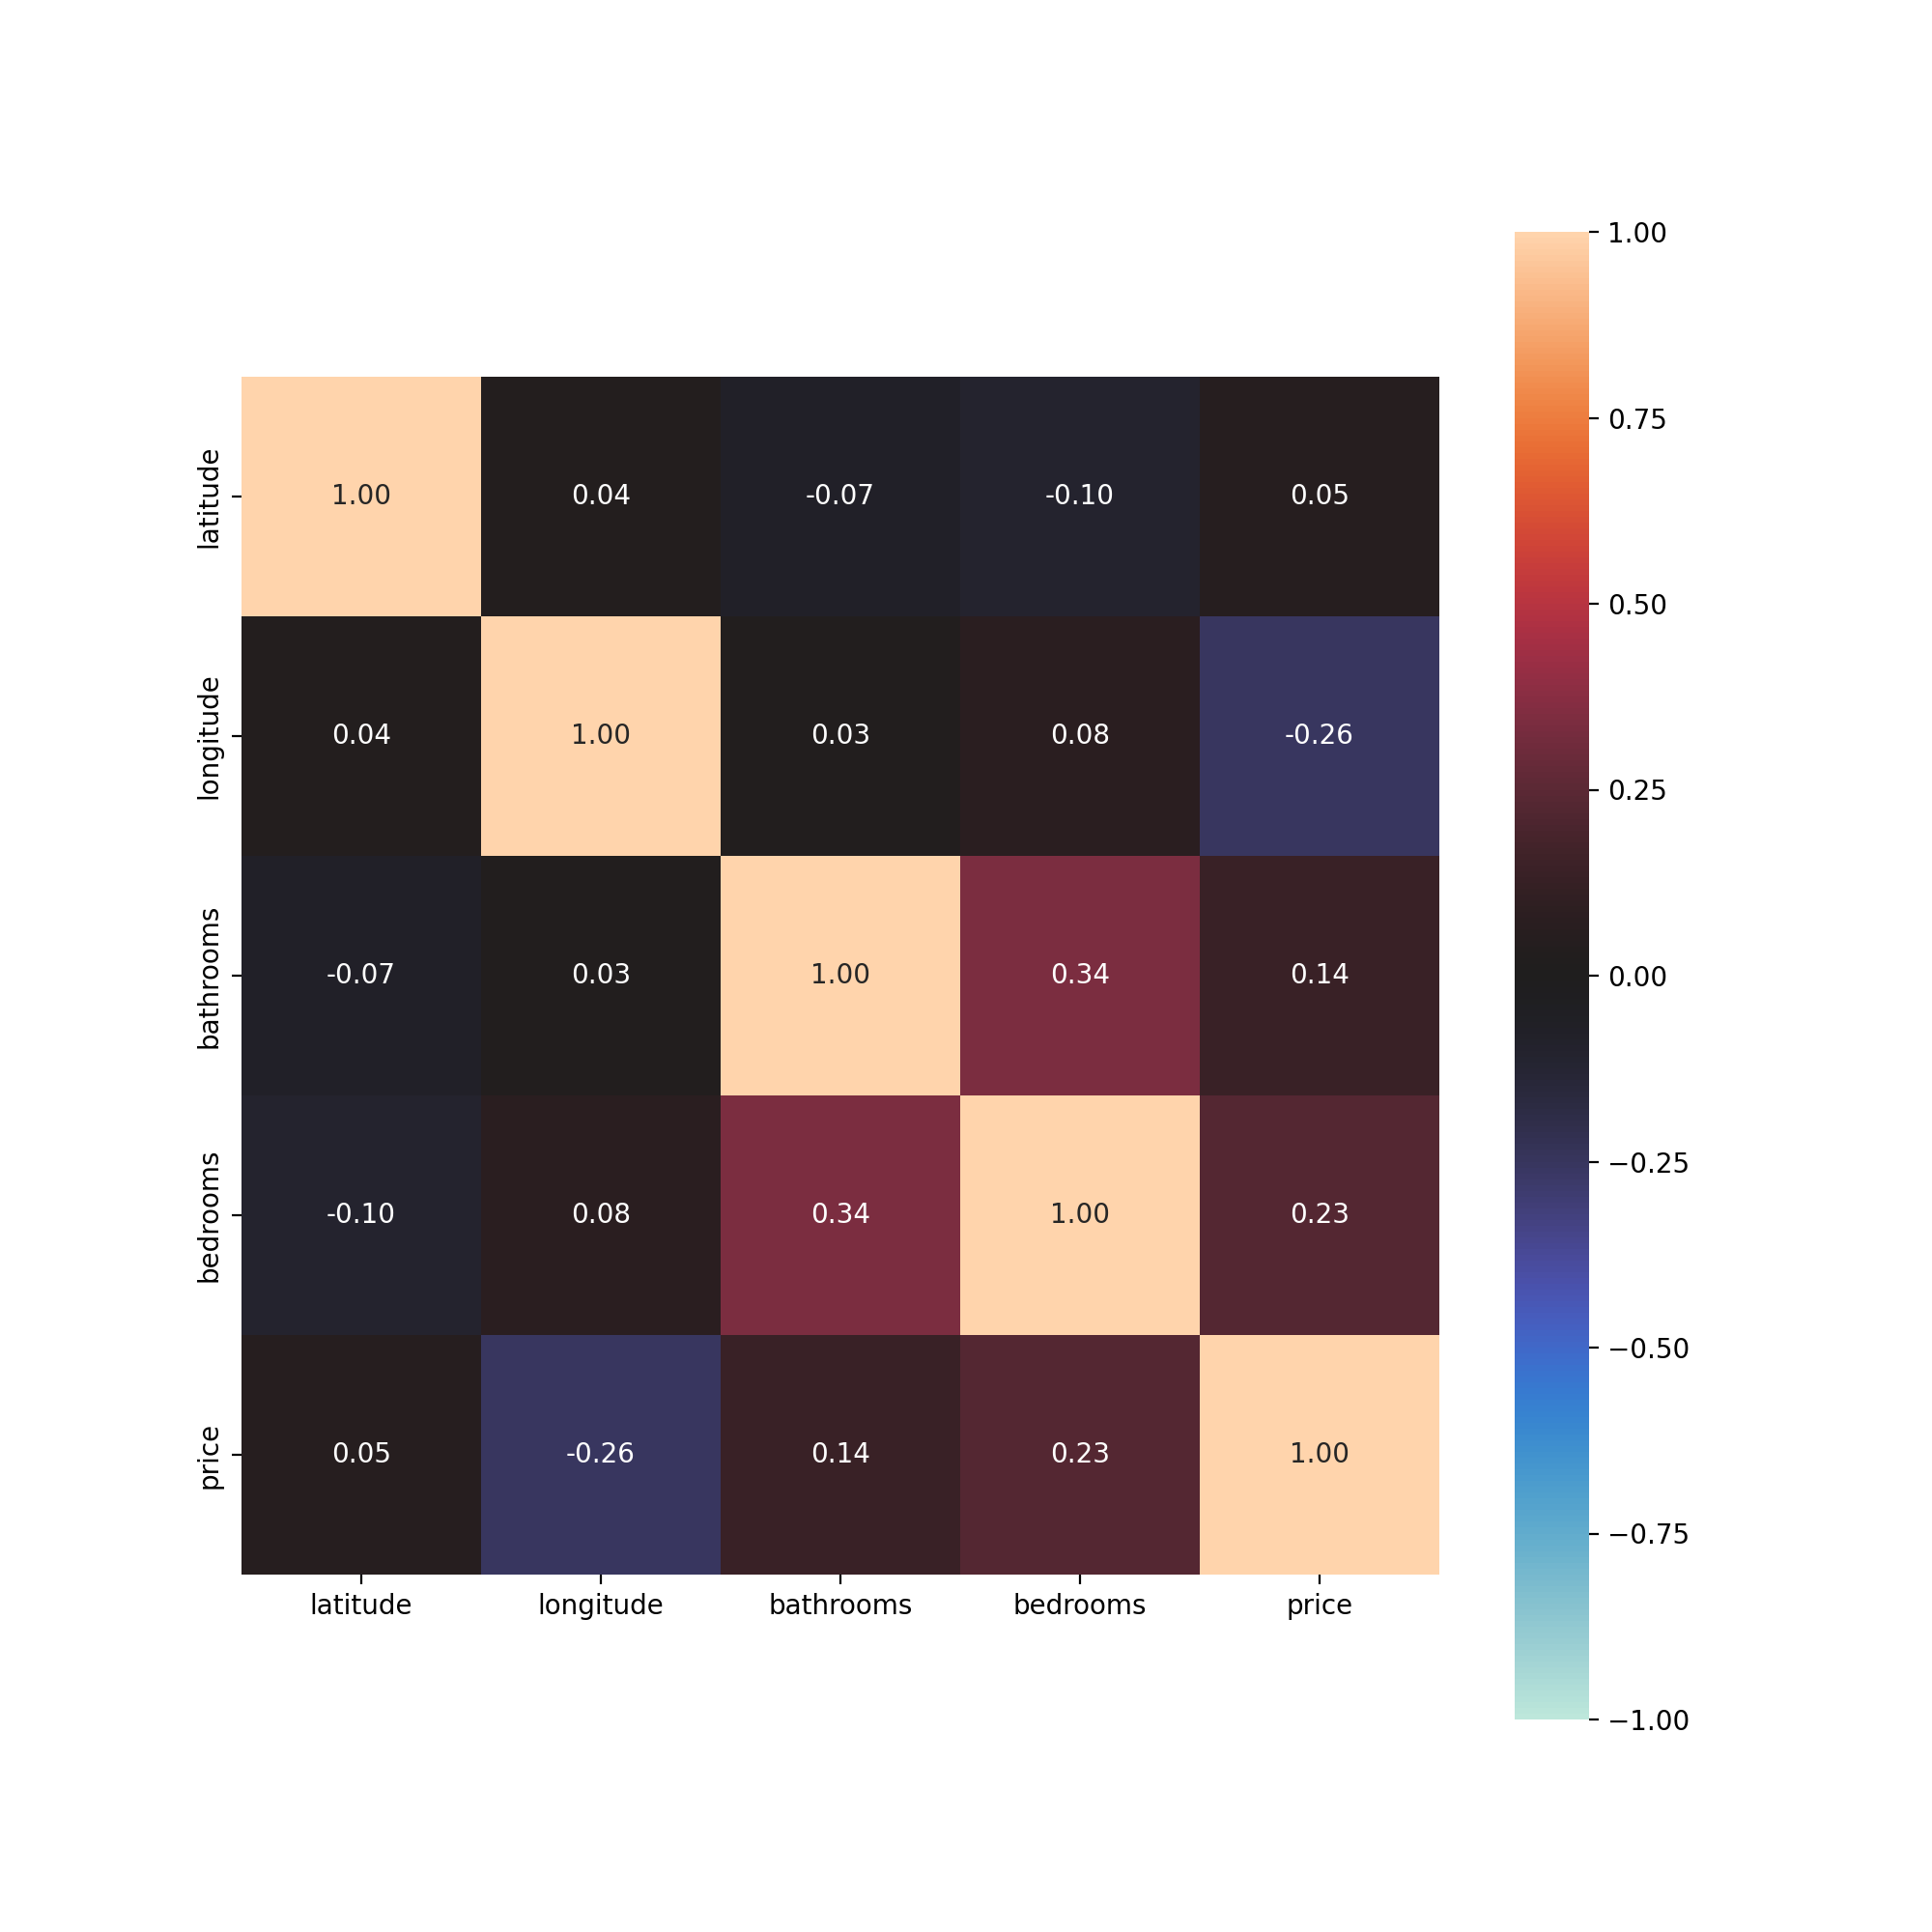

In [ ]:
# While you can always calculate pair-wise correlations,
# you can use the function below to create a correlation matrix.
# The values in cell ij represent the correlations between items i and j.
# The diagonals represent the correlation of a variable with itself, hence it is always 1.
# Compare the results below with your results above.

! pip install dython
from dython.nominal import associations
from dython.nominal import identify_nominal_columns

complete_correlation= associations(df_data_selected,
                                   nom_nom_assoc='cramer',
                                   num_num_assoc='pearson', # uses Pearson correlation coefficient, another alternative is 'spearman'
                                   filename= 'complete_correlation.png',
                                   figsize=(10,10))

In [ ]:
# Does anything in the correlation matrix surprise you?
'''
Price has a moderately negative correlation with longitude (-0.26). it suggests that as longitude increases, the price
tends to decrease. I checked the location of New York city and noticed that longitude values decrease as move to Manhattan as
one of prestige location. However, It was suprising that longitude has a stronger impact on price than variables like
number of bedrooms (0.23) and bathrooms (0.14)
'''

'''
The correlation between price and number of bedrooms is only 0.23 (and with # of bathrooms = 0.14), which is lower than I expected. one possible reason for low correlation can be higher demand for smaller units, making them expensive.
'''

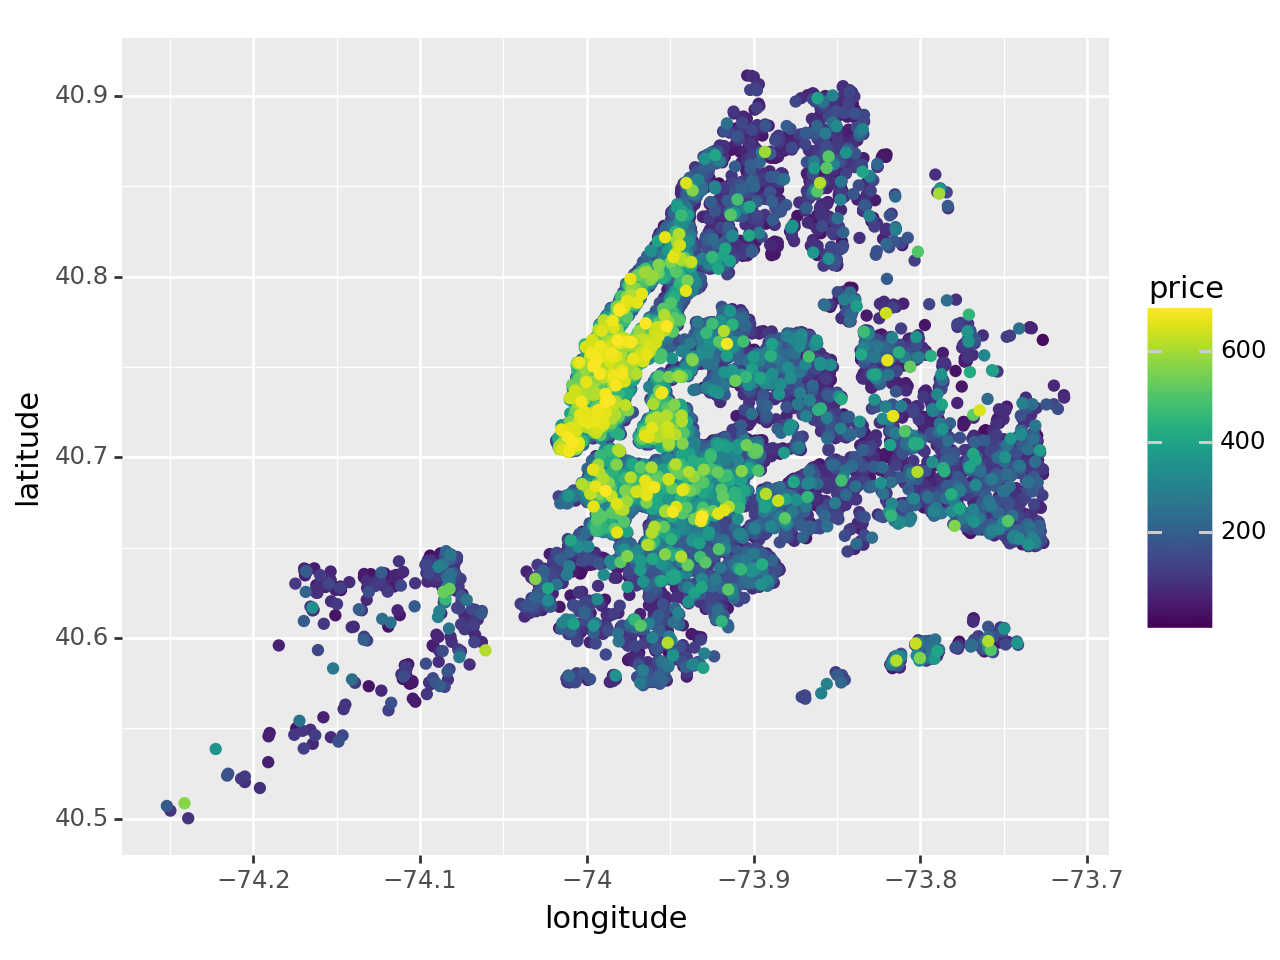

<Figure Size: (640 x 480)>

In [ ]:
# Plotting prices as a function of latitude and longitude
ggplot(df_data_selected,
       aes(x='longitude',y='latitude',color='price')) +\
       geom_point()

In [ ]:
# i)  Are there any patterns you can identify in the map? Without seeing this map,
# were able to establish this pattern from the correlation matrix alone?
'''
 The higher-priced properties appear to be concentrated around specific geographic regions (Manhattan), whereas lower-priced properties are more spread out. when we check correlation matrix,
 we can see that longitude and price have a negative correlation of -0.26, meaning that as longitude increases (moving towards the east), property prices tend to decrease.
 This pattern can also be seen in the map as some areas in the west (closer to -74 longitude) seem to have higher prices compared to areas further east.
 However, the correlation matrix alone may not give a complete picture since it only shows the linear relationship between the variables, and it’s hard to fully understand spatial patterns and nonlinear relation without the map.
 '''


'\n The higher-priced properties appear to be concentrated around specific geographic regions (Manhattan), whereas lower-priced properties are more spread out. when we check correlation matrix,\n we can see that longitude and price have a negative correlation of -0.26, meaning that as longitude increases (moving towards the east), property prices tend to decrease.\n This pattern can also be seen in the map as some areas in the west (closer to -74 longitude) seem to have higher prices compared to areas further east.\n However, the correlation matrix alone may not give a complete picture since it only shows the linear relationship between the variables, and it’s hard to fully understand spatial patterns and nonlinear relation without the map.\n '



---



---

